In [1]:
%matplotlib inline
import numpy as np
from darksight.darksight import *

/home/kai/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Load logit into NumPy
logit_f = open("./examples/data/lenet-mnist.csv", "r")
logit_np = np.loadtxt(logit_f)

# Generate knowledge by logit_np
klg = Knowledge(logit_np, T=1)

[Knowledge.__init__] <class 'torch.FloatTensor'> with size of torch.Size([10000, 10]) is loaded


In [3]:
# Give DarkSight the knowledge to distill
ds = DarkSight(klg)

In [4]:
# PyTorch DarkSight; with use_gpu=True and gpu_id=0, by default
ds.ready()

In [5]:
# Train for 1500 epochs with lr_cond, lr_y, lr_prior=1e-2, 5e-3, 1e-6
ds.train(2000, [2e-2, 1e-2, 1e-6], do_annealing=True)

-------+--------+---
 Epoch |  Loss  | T 
-------+--------+---
   100 | 0.1541 | 9
   200 | 0.1360 | 8
   300 | 0.1503 | 7
   400 | 0.1496 | 6
   500 | 0.1481 | 5
   600 | 0.1396 | 4
   700 | 0.1242 | 3
   800 | 0.0899 | 2
   900 | 0.0602 | 1
  1000 | 0.0582 | 1
  1100 | 0.0511 | 1
  1200 | 0.0473 | 1
  1300 | 0.0449 | 1
  1400 | 0.0430 | 1
  1500 | 0.0377 | 1
  1600 | 0.0321 | 1
  1700 | 0.0260 | 1
  1800 | 0.0248 | 1
  1900 | 0.0241 | 1
  2000 | 0.0236 | 1
Time used: 89.887295
Final loss: 0.023551
Accuracy to teacher: 100.0000


/home/kai/.local/lib/python2.7/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f3935de0350>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


(<matplotlib.figure.Figure at 0x7f3935e6ab10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39a4421610>)

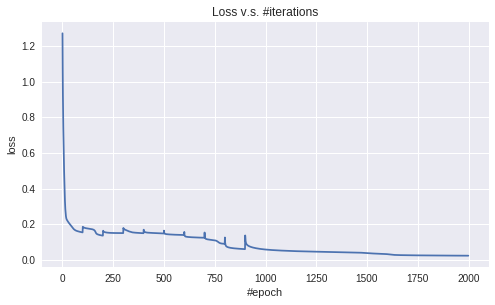

In [6]:
# Plot loss (i.e. symmetric KL divergence)
ds.plot_loss()

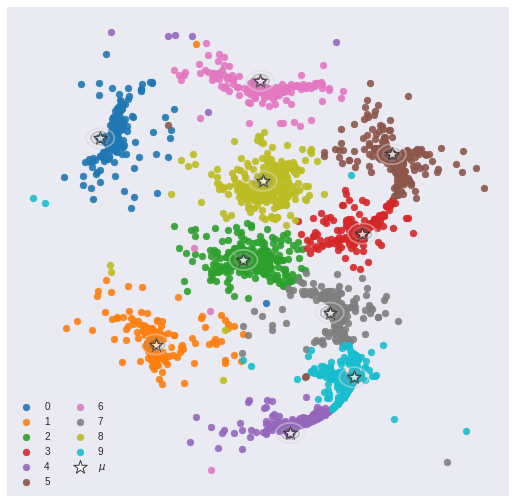

In [7]:
# Plot 2D plot; with use_gpu=True and gpu_id=0 to generate contour, by default
fig, ax = ds.plot_y(contour_on=True)
fig.savefig("./docs/lenet-mnist.png", format="png", dpi=800, bbox_inches = 'tight', pad_inches = 0)

In [8]:
# Output trained DarkSight to .csv file
ds.output("./docs/")